In [1]:
#Bounding box
bbox = [29.269398, -1.554519, 29.482104, -1.375895]

# GEDI 

GeoTIFF of GEDI ABGD downloaded from ORNL DAAC Spatial Data Access Tool (SDAT) for GEDI L4B Gridded Mean Aboveground Biomass Density (AGBD), Version 2, Mission Weeks 19-138 (https://webmap.ornl.gov/ogc/dataset.jsp?ds_id=2017)

In [2]:
%%bash
gdalinfo /shared_space/G1/gedi/sdat_2017_1_20221129_102544650.tif

Driver: GTiff/GeoTIFF
Files: /shared_space/G1/gedi/sdat_2017_1_20221129_102544650.tif
Size is 679, 1189
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (26.506672804570819,3.237479292758930)
Pixel Size = (0.010382135124089,-0.007797423980547)
Metadata:
  AREA_OR_POINT=Area
  TIFFTAG_RESOLUTIONUNIT=2 (pixels/inch)
  TIFFTAG_XRESOLUTION=72
  TIFFTAG_YRESOLUTION=72
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  26.5066728,   3.2374793) ( 26d30'24.02"E,  3d14'14.93"N)
Lower Left  (  26.5066728,  -6.0336578) ( 26d30'24.02"E,  6d 2' 1.17"S)
Upper Right (  33.5561426,   3.2374793) ( 33d33'22.11"E,  3d14'14.93"N)
Lower Right (  33.5561426,  -6.0336578) ( 33d33'22.11"E,  6d 2' 1.17"S)
Center      (  30.031407

pj_obj_create: Open of /opt/conda/share/proj failed


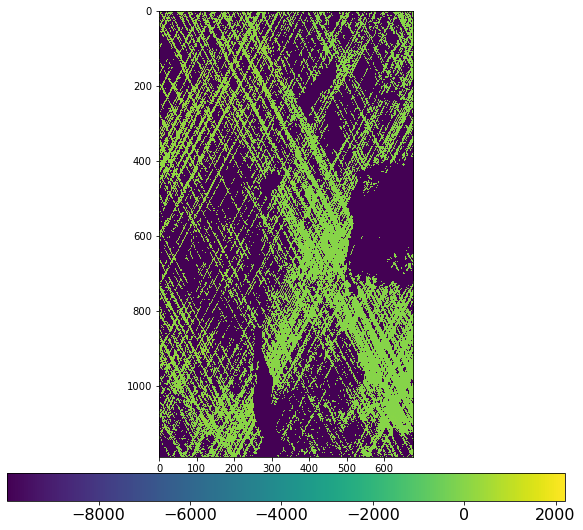

In [3]:
%matplotlib inline
import rasterio
import matplotlib.pyplot as plt
import numpy as np

#Read in GEDI GeoTIFF
file1 = '/shared_space/G1/gedi/sdat_2017_1_20221129_102544650.tif'
fp1 = rasterio.open(file1,'r')
gedi = fp1.read(1)

# Visualize GEDI 
plt.figure(figsize=(10,10))
plt.imshow(gedi)
cb = plt.colorbar(orientation='horizontal',pad=0.03)
cb.ax.tick_params(labelsize=16)
plt.show()

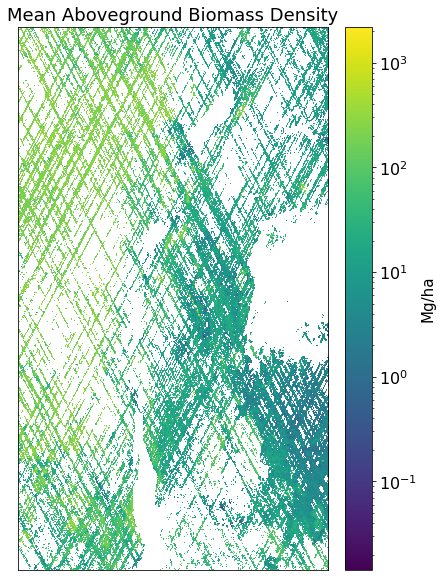

In [19]:
%matplotlib inline
import rasterio
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np


#Read in GEDI GeoTIFF
file1 = '/shared_space/G1/gedi/sdat_2017_1_20221129_102544650.tif'
fp1 = rasterio.open(file1,'r')
gedi = fp1.read(1)

#Mask out area with NoData Values
gedi_m = np.ma.masked_array(gedi,gedi==-9999)
#gedi_m = np.ma.masked_array(gedi_m,gedi>600)

# Visualize GEDI 
plt.figure(figsize=(10,10))
im = plt.imshow(gedi_m, norm=colors.LogNorm())
plt.title('Mean Aboveground Biomass Density', fontsize=18)
cb = plt.colorbar(im, orientation='vertical',pad=0.03)
plt.xticks([])
plt.yticks([])
cb.ax.tick_params(labelsize=16)
cb.set_label('Mg/ha',fontsize=15)
plt.show()

## a
Use gdalwarp to focus on study area as defined by bounding box

Might need to change resolution to match Sentinel-2 images?

In [1]:
%matplotlib inline
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [5]:
%%bash
gdalwarp -overwrite -te 29.269398 -1.554519 29.482104 -1.375895  /shared_space/G1/gedi/sdat_2017_1_20221129_102544650.tif /shared_space/G1/gedi/GEDI_cropped.tif

Creating output file that is 25P x 21L.
Processing /shared_space/G1/gedi/sdat_2017_1_20221129_102544650.tif [1/1] : 0Using internal nodata values (e.g. -9999) for image /shared_space/G1/gedi/sdat_2017_1_20221129_102544650.tif.
Copying nodata values from source /shared_space/G1/gedi/sdat_2017_1_20221129_102544650.tif to destination /shared_space/G1/gedi/GEDI_cropped.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


In [6]:
%%bash
gdalinfo /shared_space/G1/gedi/GEDI_cropped.tif

Driver: GTiff/GeoTIFF
Files: /shared_space/G1/gedi/GEDI_cropped.tif
Size is 25, 21
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (29.269397999999999,-1.375895000000000)
Pixel Size = (0.008508240000000,-0.008505904761905)
Metadata:
  AREA_OR_POINT=Area
  TIFFTAG_RESOLUTIONUNIT=2 (pixels/inch)
  TIFFTAG_XRESOLUTION=72
  TIFFTAG_YRESOLUTION=72
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  29.2693980,  -1.3758950) ( 29d16' 9.83"E,  1d22'33.22"S)
Lower Left  (  29.2693980,  -1.5545190) ( 29d16' 9.83"E,  1d33'16.27"S)
Upper Right (  29.4821040,  -1.3758950) ( 29d28'55.57"E,  1d22'33.22"S)
Lower Right (  29.4821040,  -1.5545190) ( 29d28'55.57"E,  1d33'16.27"S)
Center      (  29.3757510,  -1.4652070) ( 29d22'32.70"E,  1d27

pj_obj_create: Open of /opt/conda/share/proj failed


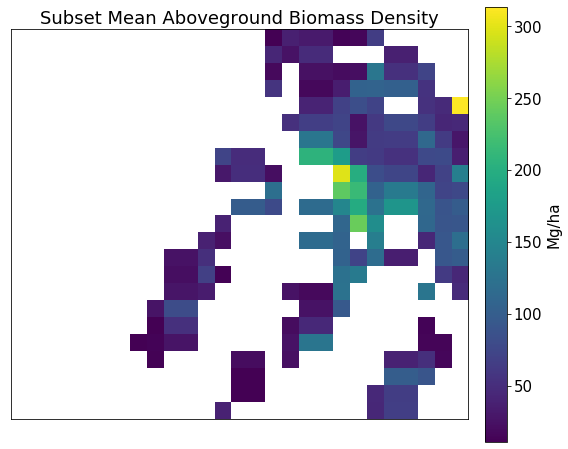

In [30]:
import numpy.ma as ma

#Read in Cropped GeoTIFF
file2 = '/shared_space/G1/gedi/GEDI_cropped.tif'
fp2 = rasterio.open(file2,'r')
gedi = fp2.read(1)

#Mask out area with NoData Values
gedi_m = np.ma.masked_array(gedi,gedi==-9999.0)

# Visualize Cropped GeoTIFF
plt.figure(figsize=(10,10))
plt.imshow(gedi_m)
plt.title('Subset Mean Aboveground Biomass Density', fontsize=18)
cb = plt.colorbar(orientation='vertical',pad=0.03, shrink=0.8)
plt.xticks([])
plt.yticks([])
cb.ax.tick_params(labelsize=15)
cb.set_label('Mg/ha',fontsize=15)

plt.show()

## Sentinel-2 
Visualize Sentinel-2 Imagery and remove clouds using Cloud Mask Layer

Use RBG combination to determine best sentinel-2 image based on amount of cloud cover

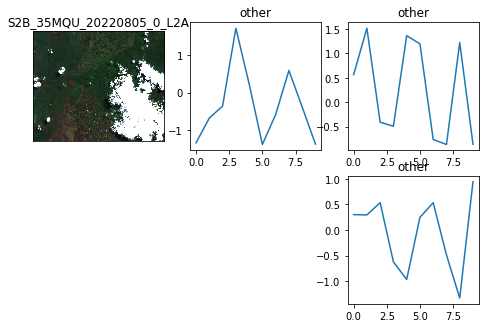

In [16]:
fig=plt.figure(figsize=(8,8))
#Read in Blue, Green and Red band tifs
file1 = '/shared_space/G1/s2/S2B_35MQU_2022080%s_0_L2A/B0%s_cropped.tif' % (5,2)
fp1 = rasterio.open(file1,'r')
blue = fp1.read(1)

file2 = '/shared_space/G1/s2/S2B_35MQU_20220805_0_L2A/B03_cropped.tif'
fp2 = rasterio.open(file2,'r')
green = fp2.read(1)

file3 = '/shared_space/G1/s2/S2B_35MQU_20220805_0_L2A/B04_cropped.tif'
fp3 = rasterio.open(file3,'r')
red = fp3.read(1)

def norm(band): #normalize from 0-1
    band_min, band_max = band.min(), band.max()
    return ((band - band_min)/(band_max - band_min))

def bright(band):#brighten image
    alpha=0.1
    beta=0.1
    return np.clip(alpha*band+beta, 0,255)

b3 = norm(bright(red))
b2 = norm(bright(green))
b1 = norm(bright(blue))

# Create RGB
rgb = np.dstack((b3,b2,b1))

# Visualize RGB
fig.add_subplot(3,3,1)
plt.imshow(rgb)
plt.xticks([])
plt.yticks([])
plt.title('S2B_35MQU_20220805_0_L2A')

In [3]:
dates = {'20220621':{'side':'A','r':[], 'b':[], 'g':[]},
         '20220711':{'side':'A','r':[], 'b':[], 'g':[]},
         '20220810':{'side':'A','r':[], 'b':[], 'g':[]},
         '20220616':{'side':'B','r':[], 'b':[], 'g':[]},
         '20220706':{'side':'B','r':[], 'b':[], 'g':[]},
         '20220805':{'side':'B','r':[], 'b':[], 'g':[]},
         '20220701':{'side':'A','r':[], 'b':[], 'g':[]},
         '20220721':{'side':'A','r':[], 'b':[], 'g':[]},
         '20220606':{'side':'B','r':[], 'b':[], 'g':[]},
         '20220626':{'side':'B','r':[], 'b':[], 'g':[]},
         '20220716':{'side':'B','r':[], 'b':[], 'g':[]},
         '20220825':{'side':'B','r':[], 'b':[], 'g':[]}
}
beams = [2,3,4]

In [2]:
dates1 = {'20220621':{'side':'A','r':[], 'b':[], 'g':[]},
         '20220711':{'side':'A','r':[], 'b':[], 'g':[]},
         '20220810':{'side':'A','r':[], 'b':[], 'g':[]},
         '20220616':{'side':'B','r':[], 'b':[], 'g':[]},
         '20220706':{'side':'B','r':[], 'b':[], 'g':[]},
         '20220805':{'side':'B','r':[], 'b':[], 'g':[]}
}

dates2 = {'20220701':{'side':'A','r':[], 'b':[], 'g':[]},
         '20220721':{'side':'A','r':[], 'b':[], 'g':[]},
         '20220606':{'side':'B','r':[], 'b':[], 'g':[]},
         '20220626':{'side':'B','r':[], 'b':[], 'g':[]},
         '20220716':{'side':'B','r':[], 'b':[], 'g':[]},
         '20220825':{'side':'B','r':[], 'b':[], 'g':[]}
}
beams = [2,3,4]

In [3]:
def norm(band): #normalize from 0-1
    band_min, band_max = band.min(), band.max()
    return ((band - band_min)/(band_max - band_min))

def bright(band):#brighten image
    alpha=0.1
    beta=0.1
    return np.clip(alpha*band+beta, 0,255)

First half image set

In [ ]:
i=0
rgb_arr=[]
fig = plt.figure(figsize=(8,8))

for date in dates1:
    i+=1
    for beam in beams:
            file = '/shared_space/G1/s2/S2%s_35MQU_%s_0_L2A/B0%s_cropped.tif' % (dates1[date]['side'],date,beam)
            fp = rasterio.open(file, 'r')
            if beam == 4:
                red = fp.read(1)
                #dates1[date]['r']=red
                
            if beam == 3:
                green = fp.read(1)
                #dates1[date]['g']=green
                
            else:
                blue = fp.read(1)
                #dates1[date]['b']=blue
               

    b33 = norm(bright(red))
    b22 = norm(bright(green))
    b11 = norm(bright(blue))

    # Create RGB
    rgb = np.dstack((b33,b22,b11))
    
    # Visualize RGB
    fig.add_subplot(3,3,i)
    plt.imshow(rgb)
    plt.xticks([])
    plt.yticks([])
    plt.title(date)
    fp.close()

plt.show()

Second half image set

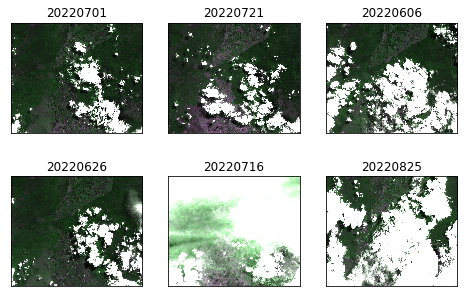

In [4]:
i=0
rgb_arr=[]
fig = plt.figure(figsize=(8,8))

for date in dates2:
    i+=1
    for beam in beams:
            file = '/shared_space/G1/s2/S2%s_35MQU_%s_0_L2A/B0%s_cropped.tif' % (dates2[date]['side'],date,beam)
            fp = rasterio.open(file, 'r')
            if beam == 4:
                red = fp.read(1)
                #dates1[date]['r']=red
                
            if beam == 3:
                green = fp.read(1)
                #dates1[date]['g']=green
                
            else:
                blue = fp.read(1)
                #dates1[date]['b']=blue
               

    b33 = norm(bright(red))
    b22 = norm(bright(green))
    b11 = norm(bright(blue))

    # Create RGB
    rgb = np.dstack((b33,b22,b11))
    
    # Visualize RGB
    fig.add_subplot(3,3,i)
    plt.imshow(rgb)
    plt.xticks([])
    plt.yticks([])
    plt.title(date)
    fp.close()

plt.show()

## a 
Load the cloud mask and remove clouds from each band (would require a for-loop)

In [38]:
%%bash
gdalinfo /shared_space/G1/s2/S2B_35MQU_20220616_0_L2A/SCL_cropped.tif

Driver: GTiff/GeoTIFF
Files: /shared_space/G1/s2/S2B_35MQU_20220616_0_L2A/SCL_cropped.tif
Size is 1180, 991
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (29.269397999999999,-1.375895000000000)
Pixel Size = (0.000180259322034,-0.000180246215943)
Metadata:
  AREA_OR_POINT=Area
  OVR_RESAMPLING_ALG=MODE
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  29.2693980,  -1.3758950) ( 29d16' 9.83"E,  1d22'33.22"S)
Lower Left  (  29.2693980,  -1.5545190) ( 29d16' 9.83"E,  1d33'16.27"S)
Upper Right (  29.4821040,  -1.3758950) ( 29d28'55.57"E,  1d22'33.22"S)
Lower Right (  29.4821040,  -1.5545190) ( 29d28'55.57"E,  1d33'16.27"S)
Center      (  29.3757510,  -1.4652070) ( 29d22'32.70"E,  1d27'54.75"S)
Band 1 Block=1180x6 Type=Byte,

pj_obj_create: Open of /opt/conda/share/proj failed


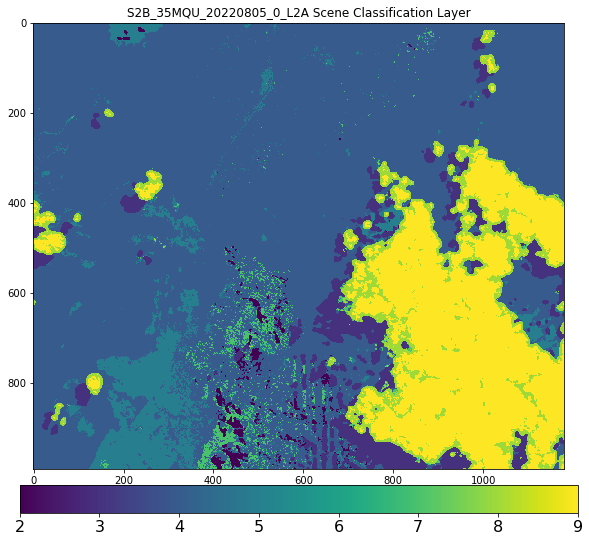

In [37]:
#Read in Cloud Mask
file4 = '/shared_space/G1/s2/S2B_35MQU_20220805_0_L2A/SCL_cropped.tif'
fp4 = rasterio.open(file4,'r')
cloud = fp4.read(1)

# Visualize Cloud Mask 
plt.figure(figsize=(10,10))
plt.imshow(cloud)
plt.title('S2B_35MQU_20220805_0_L2A Scene Classification Layer')
cb = plt.colorbar(orientation='horizontal',pad=0.03)
cb.ax.tick_params(labelsize=16)
plt.show()

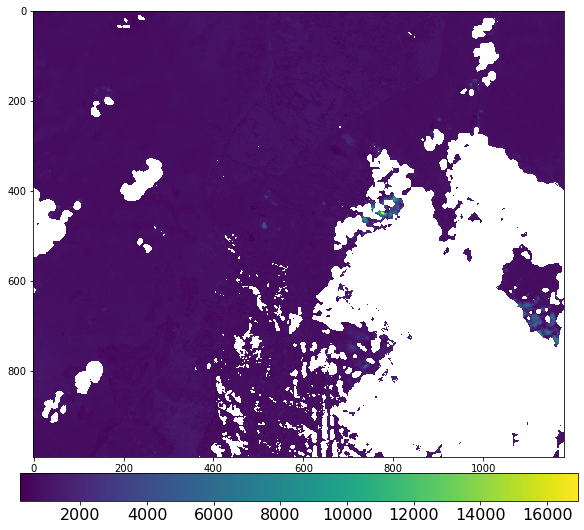

In [39]:
#Example of using cloud mask - on band 5. The other bands may need to upscale the resolution in order use the mask

#Read in Band 05 tif
file = '/shared_space/G1/s2/S2B_35MQU_20220805_0_L2A/B05_cropped.tif'
fp = rasterio.open(file,'r')
b5 = fp.read(1)



#Mask out cloud areas
b5_m = np.ma.masked_array(b5,cloud==9)
b5_m = np.ma.masked_array(b5_m,cloud==8)
b5_m = np.ma.masked_array(b5_m,cloud==3)
b5_m = np.ma.masked_array(b5_m,cloud==2)
b5_m = np.ma.masked_array(b5_m,cloud==0)


# Visualize B05 with clouds masked
plt.figure(figsize=(10,10))
plt.imshow(b5_m)
cb = plt.colorbar(orientation='horizontal',pad=0.03)
cb.ax.tick_params(labelsize=16)
plt.show()

To do:
1. Remove clouds from each band (may need to make sure all the resolutions are the same using gdalwarp)
2. Compile all the bands and create any relevant indicies (NDVI, EVI, etc...)
3. Build model using SKLearn

In [ ]:
#remove clouds using cloud mask
#load cloud mask and iterate through bands